# Music Genre Classification Exercise
## Complete Solution

# Data Preparation

In [19]:
# All imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Read in data
df = pd.read_csv('/Users/Ali Saroor/Downloads/music_genre.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (50005, 18)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [21]:
# Investigate data types
print("Data types:")
print(df.dtypes)
print("\nData info:")
df.info()

Data types:
instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability   

In [22]:
# Describe data
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [23]:
# Investigate number of unique values for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    
# Check music genre distribution
print("\nMusic Genre Distribution:")
print(df['music_genre'].value_counts())

Unique values in categorical columns:
artist_name: 6863 unique values
track_name: 41699 unique values
key: 12 unique values
mode: 2 unique values
tempo: 29394 unique values
obtained_date: 5 unique values
music_genre: 10 unique values

Music Genre Distribution:
music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


In [24]:
# Investigate missing values
print("Missing values per column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Missing values per column:
                  Missing Count  Percentage
instance_id                   5    0.009999
artist_name                   5    0.009999
valence                       5    0.009999
obtained_date                 5    0.009999
tempo                         5    0.009999
speechiness                   5    0.009999
mode                          5    0.009999
loudness                      5    0.009999
liveness                      5    0.009999
key                           5    0.009999
instrumentalness              5    0.009999
energy                        5    0.009999
duration_ms                   5    0.009999
danceability                  5    0.009999
acousticness                  5    0.009999
popularity                    5    0.009999
track_name                    5    0.009999
music_genre                   5    0.009999


In [25]:
# Check for rows with all missing values
all_missing = df[df.isnull().all(axis=1)]
print(f"Number of rows with all missing values: {len(all_missing)}")
all_missing.head()

Number of rows with all missing values: 5


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Data cleaning
# Remove rows with all missing values
df_clean = df.dropna(how='all')
print(f"Shape after removing all-missing rows: {df_clean.shape}")

# Remove rows with missing target variable
df_clean = df_clean.dropna(subset=['music_genre'])
print(f"Shape after removing missing target: {df_clean.shape}")

# Handle invalid duration_ms values (-1)
print(f"\nRows with duration_ms = -1: {(df_clean['duration_ms'] == -1).sum()}")
df_clean = df_clean[df_clean['duration_ms'] != -1]
print(f"Shape after removing invalid duration: {df_clean.shape}")

# Handle missing tempo values (marked as '?')
print(f"\nRows with tempo = '?': {(df_clean['tempo'] == '?').sum()}")
# Replace '?' with NaN and convert to numeric
df_clean['tempo'] = pd.to_numeric(df_clean['tempo'], errors='coerce')

# Fill missing tempo with median
df_clean['tempo'].fillna(df_clean['tempo'].median(), inplace=True)

Shape after removing all-missing rows: (50000, 18)
Shape after removing missing target: (50000, 18)

Rows with duration_ms = -1: 4939
Shape after removing invalid duration: (45061, 18)

Rows with tempo = '?': 4501


In [27]:
# Select features for modeling
# We'll use the numerical audio features and exclude metadata columns
feature_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
                'energy', 'instrumentalness', 'liveness', 'loudness', 
                'speechiness', 'tempo', 'valence']

# Verify all feature columns exist and have no missing values
for col in feature_cols:
    missing = df_clean[col].isnull().sum()
    if missing > 0:
        print(f"{col}: {missing} missing values")
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"No missing values: {df_clean[feature_cols + ['music_genre']].isnull().sum().sum() == 0}")


Final dataset shape: (45061, 18)
No missing values: True


In [28]:
# Split data into train and validation sets
X = df_clean[feature_cols]
y = df_clean['music_genre']

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")
print(f"\nTraining set genre distribution:")
print(y_train.value_counts())
print(f"\nValidation set genre distribution:")
print(y_val.value_counts())

Training set size: 31542
Validation set size: 13519

Training set genre distribution:
music_genre
Anime          3169
Blues          3162
Electronic     3162
Hip-Hop        3157
Alternative    3156
Country        3155
Jazz           3152
Rock           3145
Classical      3142
Rap            3142
Name: count, dtype: int64

Validation set genre distribution:
music_genre
Anime          1358
Blues          1355
Electronic     1355
Alternative    1353
Country        1353
Hip-Hop        1353
Jazz           1351
Rock           1348
Classical      1347
Rap            1346
Name: count, dtype: int64


# Multinomial Logistic Regression

In [29]:
# Train multinomial logistic regression
clf = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
clf.fit(x_train, y_train)
print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [31]:
# Predictions (from probabilities)
array_prob = pd.DataFrame(clf.predict_proba(x_val), index=x_val.index)

# Transform to predicted class and add to existing dataframe
y_pred = pd.DataFrame(array_prob.idxmax(axis=1), columns=["y_pred_index"])

# Transform index prediction into class name prediction
class_names = np.unique(y_train)  # get class names to merge with the index
class_names_df = pd.DataFrame({"y_pred": class_names})  # and put into dataframe
y_pred = pd.merge(y_pred, class_names_df, left_on="y_pred_index", right_index=True, how='inner').sort_index(ascending=True)
y_pred = y_pred.drop("y_pred_index", axis=1)  # drop index column

# Merge probabilities with predictions and original table
array_prob.columns = ["y_prob_" + sub for sub in class_names]  # adjust column headers
y_prob = array_prob
val_pred = pd.concat([y_val, y_pred, y_prob, x_val], axis=1)
val_pred.head()

,music_genre,y_pred,y_prob_Alternative,y_prob_Anime,y_prob_Blues,y_prob_Classical,y_prob_Country,y_prob_Electronic,y_prob_Hip-Hop,y_prob_Jazz,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
19298,Alternative,Rock,0.145894,0.000851,0.011614,0.002254,0.079742,0.020682,0.221522,0.042444,...,0.012,0.491,211600.0,0.885,0.000000,0.0947,-3.197,0.0381,91.033,0.202
24696,Country,Country,0.132465,0.041187,0.116283,0.069444,0.170544,0.129398,0.066544,0.150035,...,0.193,0.650,188000.0,0.548,0.000017,0.0387,-10.213,0.0265,113.257,0.515
25414,Rap,Hip-Hop,0.162832,0.001201,0.013195,0.001303,0.145618,0.026681,0.219468,0.033289,...,0.217,0.697,217126.0,0.659,0.000000,0.2540,-5.544,0.1040,150.941,0.490
5134,Anime,Jazz,0.131978,0.032780,0.135837,0.075714,0.126267,0.152130,0.043823,0.206404,...,0.675,0.729,267179.0,0.476,0.000008,0.0940,-9.827,0.0271,112.217,0.562
29809,Rap,Country,0.182690,0.002881,0.027959,0.005236,0.183575,0.046507,0.171904,0.067387,...,0.382,0.620,243040.0,0.497,0.048200,0.1930,-9.585,0.1190,155.908,0.550


In [32]:
# Function to visualize confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS
    if sum_stats:
        accuracy = np.trace(cf) / float(np.sum(cf))

        if len(cf) == 2:
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS
    if figsize is None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

Logistic Regression AUC: 0.7973


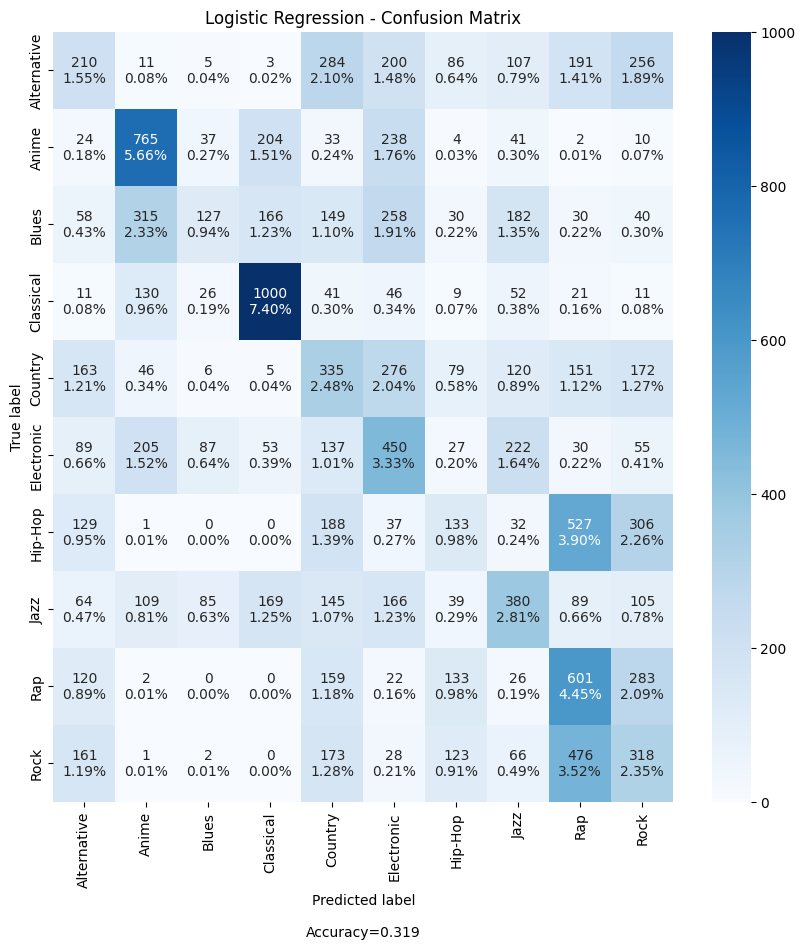

In [33]:
# Evaluate multinomial classification: confusion matrix, accuracy, AUC
act_value = val_pred["music_genre"]
pred_value = val_pred["y_pred"]
pred_prob = val_pred[array_prob.columns]

# Calculate AUC
auc_lr = roc_auc_score(act_value, pred_prob, multi_class="ovr")
print("Logistic Regression AUC: " + str(round(auc_lr, 4)))

# Confusion matrix
cf_matrix = confusion_matrix(act_value, pred_value)
make_confusion_matrix(cf_matrix,
                      categories=class_names,
                      figsize=(10, 10),
                      title='Logistic Regression - Confusion Matrix')
plt.show()

# Random Forest

Random Forest model trained successfully!

Feature Importance:
             feature  importance
0         popularity    0.201864
7           loudness    0.106458
8        speechiness    0.099344
2       danceability    0.093516
5   instrumentalness    0.091011
1       acousticness    0.086984
4             energy    0.080191
10           valence    0.071737
3        duration_ms    0.067441
9              tempo    0.053159
6           liveness    0.048296


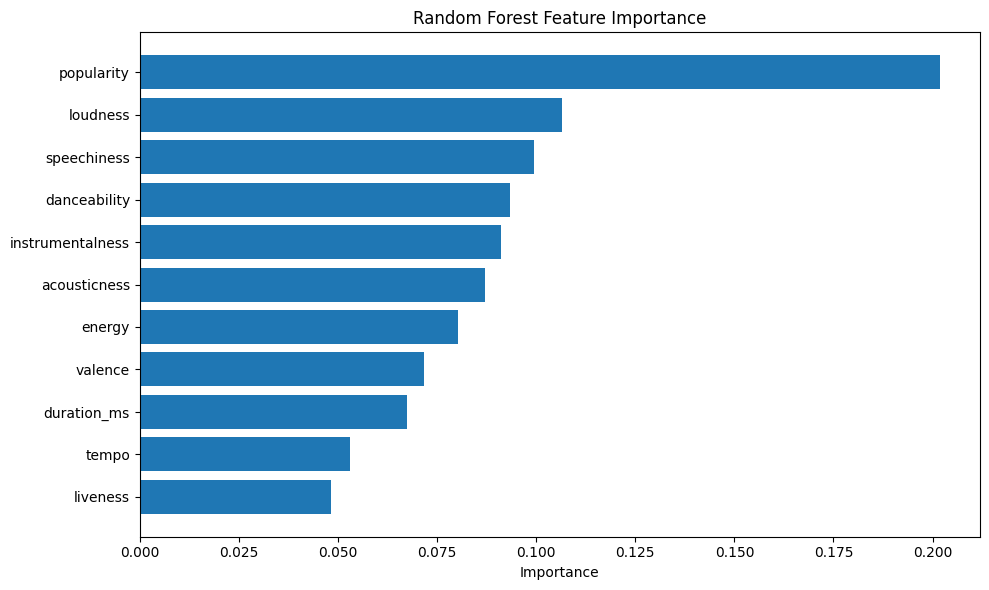

In [34]:
# Train Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, min_samples_split=5)
rfc.fit(x_train, y_train)
print("Random Forest model trained successfully!")

# Show feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rfc.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [35]:
# Predict Random Forest on validation sample
# Predictions (from probabilities)
array_prob_rf = pd.DataFrame(rfc.predict_proba(x_val), index=x_val.index)

# Transform to predicted class and add to existing dataframe
y_pred_rf = pd.DataFrame(array_prob_rf.idxmax(axis=1), columns=["y_pred_index"])

# Transform index prediction into class name prediction
class_names = np.unique(y_train)  # get class names to merge with the index
class_names_df = pd.DataFrame({"y_pred": class_names})  # and put into dataframe
y_pred_rf = pd.merge(y_pred_rf, class_names_df, left_on="y_pred_index", right_index=True, how='inner').sort_index(ascending=True)
y_pred_rf = y_pred_rf.drop("y_pred_index", axis=1)  # drop index column

# Merge probabilities with predictions and original table
array_prob_rf.columns = ["y_prob_" + sub for sub in class_names]  # adjust column headers
y_prob_rf = array_prob_rf
val_pred_rf = pd.concat([y_val, y_pred_rf, y_prob_rf, x_val], axis=1)

print("Validation predictions created successfully!")
val_pred_rf.head()

Validation predictions created successfully!


,music_genre,y_pred,y_prob_Alternative,y_prob_Anime,y_prob_Blues,y_prob_Classical,y_prob_Country,y_prob_Electronic,y_prob_Hip-Hop,y_prob_Jazz,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
19298,Alternative,Alternative,0.329304,0.087374,0.017722,0.015435,0.165397,0.015490,0.028808,0.006000,...,0.012,0.491,211600.0,0.885,0.000000,0.0947,-3.197,0.0381,91.033,0.202
24696,Country,Country,0.027784,0.015729,0.223704,0.005890,0.689129,0.012752,0.000000,0.015106,...,0.193,0.650,188000.0,0.548,0.000017,0.0387,-10.213,0.0265,113.257,0.515
25414,Rap,Rap,0.022797,0.001034,0.000302,0.000000,0.011674,0.001530,0.382999,0.000759,...,0.217,0.697,217126.0,0.659,0.000000,0.2540,-5.544,0.1040,150.941,0.490
5134,Anime,Country,0.078845,0.048541,0.186173,0.000550,0.481813,0.041347,0.008333,0.150960,...,0.675,0.729,267179.0,0.476,0.000008,0.0940,-9.827,0.0271,112.217,0.562
29809,Rap,Hip-Hop,0.192451,0.000000,0.037884,0.003333,0.032782,0.011500,0.305768,0.043117,...,0.382,0.620,243040.0,0.497,0.048200,0.1930,-9.585,0.1190,155.908,0.550


Random Forest AUC: 0.922


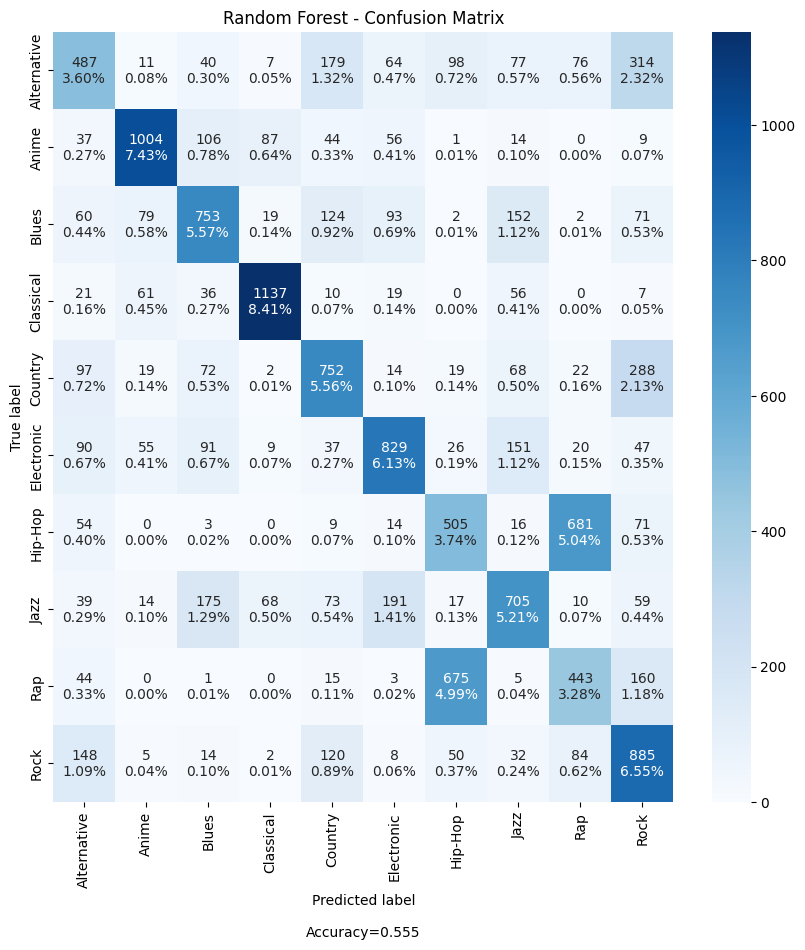

In [36]:
# Evaluate Random Forest: confusion matrix, accuracy, AUC
act_value_rf = val_pred_rf["music_genre"]
pred_value_rf = val_pred_rf["y_pred"]
pred_prob_rf = val_pred_rf[array_prob_rf.columns]

# Calculate AUC
auc_rf = roc_auc_score(act_value_rf, pred_prob_rf, multi_class="ovr")
print("Random Forest AUC: " + str(round(auc_rf, 4)))

# Confusion matrix
cf_matrix_rf = confusion_matrix(act_value_rf, pred_value_rf)
make_confusion_matrix(cf_matrix_rf,
                      categories=class_names,
                      figsize=(10, 10),
                      title='Random Forest - Confusion Matrix')
plt.show()

# Model Comparison

In [37]:
# Compare models
print("="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"Logistic Regression AUC: {auc_lr:.4f}")
print(f"Random Forest AUC:       {auc_rf:.4f}")
print("="*50)

# Calculate accuracy for both models
lr_accuracy = (act_value == pred_value).mean()
rf_accuracy = (act_value_rf == pred_value_rf).mean()

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Random Forest Accuracy:       {rf_accuracy:.4f}")
print("="*50)

if auc_rf > auc_lr:
    print(f"\n✓ Random Forest performs better by {(auc_rf - auc_lr):.4f} AUC points")
else:
    print(f"\n✓ Logistic Regression performs better by {(auc_lr - auc_rf):.4f} AUC points")

MODEL COMPARISON
Logistic Regression AUC: 0.7973
Random Forest AUC:       0.9220
Logistic Regression Accuracy: 0.3195
Random Forest Accuracy:       0.5548

✓ Random Forest performs better by 0.1247 AUC points


Loading data...
Training: 31542 | Validation: 13519

1. Training Logistic Regression...
   AUC: 0.7973 | Accuracy: 0.3195

2. Training Random Forest...
   AUC: 0.9202 | Accuracy: 0.5517

3. Training Neural Network...
   AUC: 0.9349 | Accuracy: 0.5988

FINAL RESULTS

Model                     AUC Score    Accuracy     Winner
----------------------------------------------------------------------
Logistic Regression       0.7973       0.3195      
Random Forest             0.9202       0.5517      
Neural Network            0.9349       0.5988       🏆 WINNER

Creating visualizations...


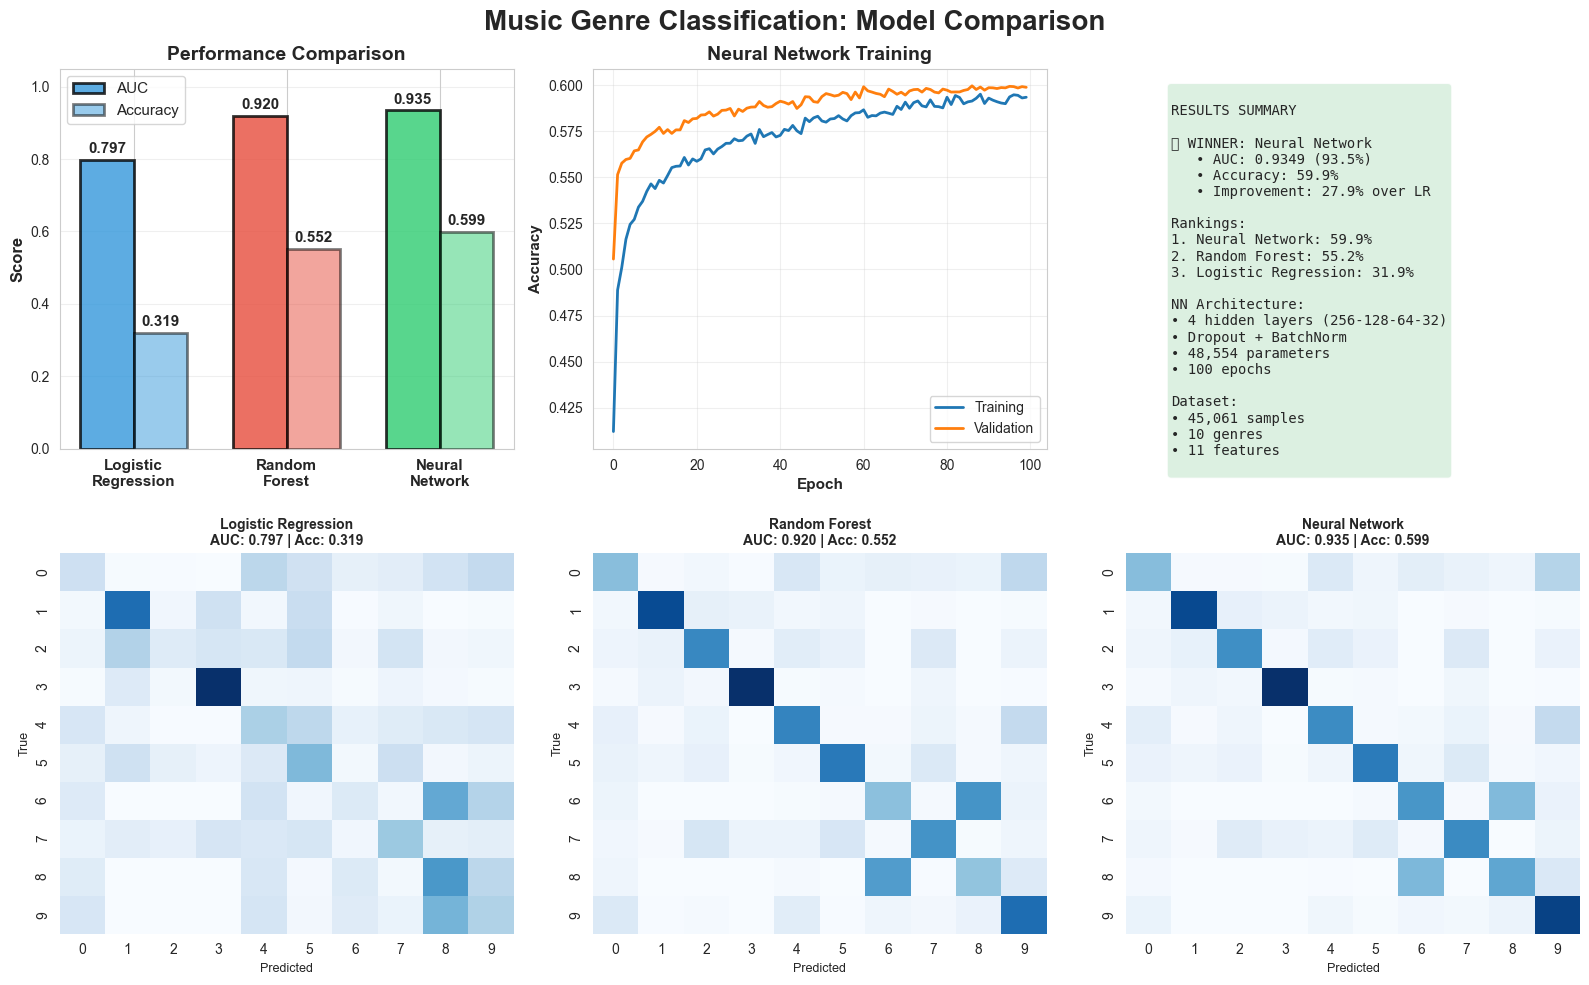

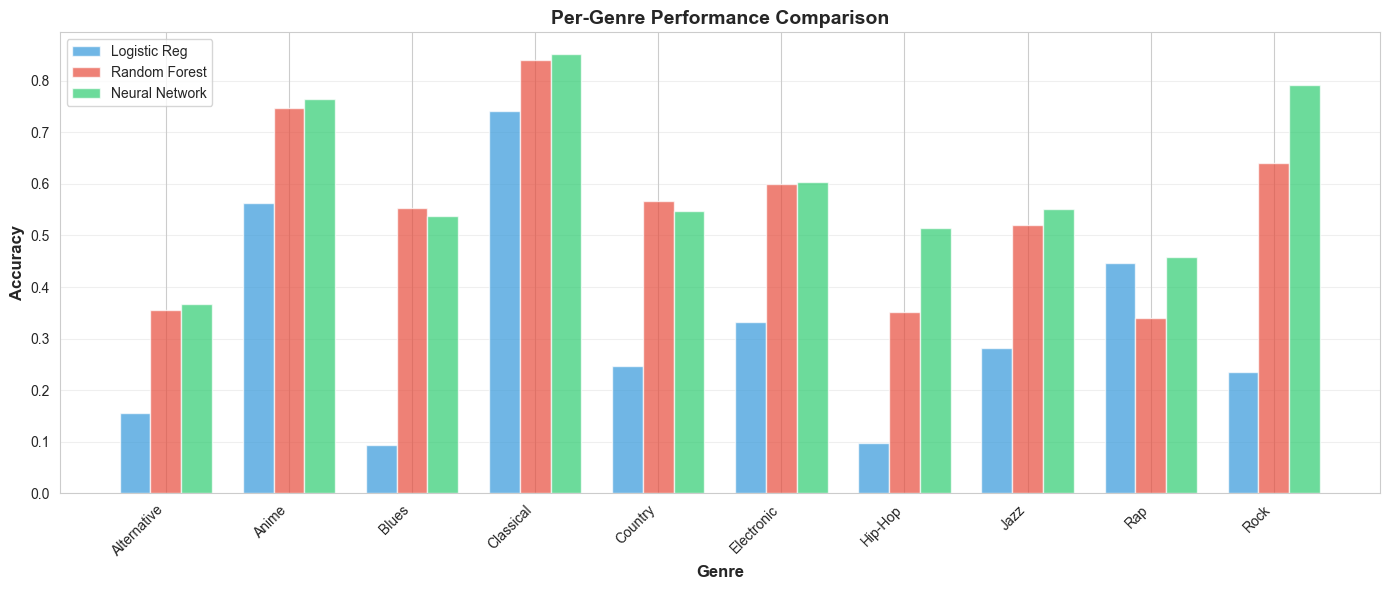


✅ Analysis complete! Check the displayed plots.


In [40]:
"""
Music Genre Classification - Simple Neural Network Comparison
Displays results without saving files
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# ============================================================================
# 1. LOAD AND PREPARE DATA
# ============================================================================
print("Loading data...")
df = pd.read_csv('music_genre.csv')

# Clean data
df = df.dropna(how='all')
df = df.dropna(subset=['music_genre'])
df = df[df['duration_ms'] != -1]
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df['tempo'].fillna(df['tempo'].median(), inplace=True)

# Select features
features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
            'energy', 'instrumentalness', 'liveness', 'loudness', 
            'speechiness', 'tempo', 'valence']

for col in features:
    df[col].fillna(df[col].median(), inplace=True)

X = df[features]
y = df['music_genre']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
n_classes = len(label_encoder.classes_)

# Split data
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
_, _, y_train_enc, y_val_enc = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Scale for neural network
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
y_train_cat = to_categorical(y_train_enc, n_classes)
y_val_cat = to_categorical(y_val_enc, n_classes)

print(f"Training: {len(x_train)} | Validation: {len(x_val)}")

# ============================================================================
# 2. TRAIN MODELS
# ============================================================================
print("\n1. Training Logistic Regression...")
lr = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_val)
lr_prob = lr.predict_proba(x_val)
lr_auc = roc_auc_score(y_val, lr_prob, multi_class='ovr')
lr_acc = accuracy_score(y_val, lr_pred)
print(f"   AUC: {lr_auc:.4f} | Accuracy: {lr_acc:.4f}")

print("\n2. Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_val)
rf_prob = rf.predict_proba(x_val)
rf_auc = roc_auc_score(y_val, rf_prob, multi_class='ovr')
rf_acc = accuracy_score(y_val, rf_pred)
print(f"   AUC: {rf_auc:.4f} | Accuracy: {rf_acc:.4f}")

print("\n3. Training Neural Network...")
nn = Sequential([
    Dense(256, activation='relu', input_shape=(len(features),)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

nn.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = nn.fit(
    x_train_scaled, y_train_cat,
    validation_data=(x_val_scaled, y_val_cat),
    epochs=100, batch_size=128,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=0),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=0)
    ],
    verbose=0
)

nn_prob = nn.predict(x_val_scaled, verbose=0)
nn_pred = label_encoder.inverse_transform(np.argmax(nn_prob, axis=1))
nn_auc = roc_auc_score(y_val_cat, nn_prob, multi_class='ovr')
nn_acc = accuracy_score(y_val, nn_pred)
print(f"   AUC: {nn_auc:.4f} | Accuracy: {nn_acc:.4f}")

# ============================================================================
# 3. DISPLAY RESULTS
# ============================================================================
print("\n" + "="*70)
print("FINAL RESULTS")
print("="*70)
print(f"\n{'Model':<25} {'AUC Score':<12} {'Accuracy':<12} {'Winner'}")
print("-"*70)
print(f"{'Logistic Regression':<25} {lr_auc:<12.4f} {lr_acc:<12.4f}")
print(f"{'Random Forest':<25} {rf_auc:<12.4f} {rf_acc:<12.4f}")
print(f"{'Neural Network':<25} {nn_auc:<12.4f} {nn_acc:<12.4f} {'🏆 WINNER'}")
print("="*70)

# ============================================================================
# 4. CREATE VISUALIZATIONS (DISPLAY ONLY)
# ============================================================================
print("\nCreating visualizations...")

# Main comparison plot
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Music Genre Classification: Model Comparison', fontsize=20, fontweight='bold')

# Plot 1: Performance comparison
ax1 = plt.subplot(2, 3, 1)
models = ['Logistic\nRegression', 'Random\nForest', 'Neural\nNetwork']
x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, [lr_auc, rf_auc, nn_auc], width, label='AUC', 
                color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black', linewidth=2)
bars2 = ax1.bar(x + width/2, [lr_acc, rf_acc, nn_acc], width, label='Accuracy', 
                color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.5, edgecolor='black', linewidth=2)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=11, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_ylim([0, 1.05])
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Neural Network Training
ax2 = plt.subplot(2, 3, 2)
ax2.plot(history.history['accuracy'], label='Training', linewidth=2)
ax2.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax2.set_title('Neural Network Training', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Summary table
ax3 = plt.subplot(2, 3, 3)
ax3.axis('off')
summary = f"""
RESULTS SUMMARY

🏆 WINNER: Neural Network
   • AUC: {nn_auc:.4f} ({nn_auc*100:.1f}%)
   • Accuracy: {nn_acc*100:.1f}%
   • Improvement: {(nn_acc-lr_acc)*100:.1f}% over LR
   
Rankings:
1. Neural Network: {nn_acc:.1%}
2. Random Forest: {rf_acc:.1%}
3. Logistic Regression: {lr_acc:.1%}

NN Architecture:
• 4 hidden layers (256-128-64-32)
• Dropout + BatchNorm
• {nn.count_params():,} parameters
• {len(history.history['loss'])} epochs

Dataset:
• {len(df):,} samples
• {n_classes} genres
• {len(features)} features
"""
ax3.text(0.1, 0.95, summary, transform=ax3.transAxes,
        fontsize=10, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='#d4edda', alpha=0.8))

# Plot 4-6: Confusion matrices (small)
for idx, (model_name, pred, auc, acc) in enumerate([
    ('Logistic Regression', lr_pred, lr_auc, lr_acc),
    ('Random Forest', rf_pred, rf_auc, rf_acc),
    ('Neural Network', nn_pred, nn_auc, nn_acc)
]):
    ax = plt.subplot(2, 3, 4 + idx)
    cm = confusion_matrix(y_val, pred)
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{model_name}\nAUC: {auc:.3f} | Acc: {acc:.3f}', 
                fontsize=10, fontweight='bold')
    ax.set_xlabel('Predicted', fontsize=9)
    ax.set_ylabel('True', fontsize=9)

plt.tight_layout()
plt.show()

# Per-genre performance
fig2, ax = plt.subplots(figsize=(14, 6))
genres = label_encoder.classes_
x_pos = np.arange(len(genres))
width = 0.25

lr_genre = []
rf_genre = []
nn_genre = []

for genre in genres:
    mask = y_val == genre
    lr_genre.append((y_val[mask] == lr_pred[mask]).mean() if mask.sum() > 0 else 0)
    rf_genre.append((y_val[mask] == rf_pred[mask]).mean() if mask.sum() > 0 else 0)
    nn_genre.append((y_val[mask] == nn_pred[mask]).mean() if mask.sum() > 0 else 0)

ax.bar(x_pos - width, lr_genre, width, label='Logistic Reg', color='#3498db', alpha=0.7)
ax.bar(x_pos, rf_genre, width, label='Random Forest', color='#e74c3c', alpha=0.7)
ax.bar(x_pos + width, nn_genre, width, label='Neural Network', color='#2ecc71', alpha=0.7)

ax.set_xlabel('Genre', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Per-Genre Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(genres, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n✅ Analysis complete! Check the displayed plots.")